In [1]:
%pylab nbagg
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
numFrames = 10000 # must be even

# Creates two ground truth localizations, one at (0,0) and another at (200,200)
locs = pd.DataFrame(np.vstack((np.zeros((numFrames,2)), 200 * np.ones((numFrames,2)))),
                        index = np.arange(0, 2 * numFrames),
                        columns = ['x [nm]', 'y [nm]'])
locs = pd.concat([locs, pd.DataFrame(np.hstack((np.arange(0, numFrames), np.arange(0,numFrames))),
                                    index = np.arange(0,2 *numFrames),
                                    columns = ['frame'])], axis = 1)
locs = pd.concat([locs, pd.DataFrame(columns = ['z [nm]',
                                               'uncertainty [nm]',
                                               'intensity [photon]',
                                               'offset [photon]',
                                               'loglikelihood',
                                               'sigma [nm]'],
                                     index = np.arange(0,numFrames))], axis = 1)
locs['z [nm]']             = np.zeros(2*numFrames)
locs['uncertainty [nm]']   = 10 * np.ones(2*numFrames) + np.random.randn(2*numFrames)
locs['intensity [photon]'] = 1000 * np.ones(2*numFrames) + 100 * np.random.randn(2*numFrames)
locs['offset [photon]']    = 100 * np.ones(2*numFrames) + 10 * np.random.randn(2*numFrames)
locs['loglikelihood']      = 180 * np.ones(2*numFrames) + 30 * np.random.randn(2*numFrames)
locs['sigma [nm]']         = 140 * np.ones(2*numFrames) + 20 * np.random.randn(2*numFrames)
locs.sort_values('frame', inplace = True)
locs.index = np.arange(0, locs.shape[0])

In [3]:
locs.head()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
0,0.0,0.0,0,0.0,11.846750,1133.529413,106.771677,195.681105,130.815288
1,200.0,200.0,0,0.0,8.030771,965.377076,87.482509,189.808398,167.639407
2,200.0,200.0,1,0.0,9.739837,871.172118,95.214598,123.703294,143.832099
3,0.0,0.0,1,0.0,10.575083,931.463884,98.547417,213.897172,154.525313
4,0.0,0.0,2,0.0,10.848551,930.701567,106.245948,192.916467,123.596653


In [4]:
locs.describe()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
count,20000.0000,20000.0000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,100.0000,100.0000,4999.500000,0.0,9.993349,999.778859,99.994944,180.118921,139.939008
std,100.0025,100.0025,2886.823503,0.0,0.988789,100.931323,10.003689,30.045888,19.998106
min,0.0000,0.0000,0.000000,0.0,5.978422,586.732044,61.303964,60.383540,62.876241
25%,0.0000,0.0000,2499.750000,0.0,9.330594,931.623798,93.163448,159.700474,126.543136
50%,100.0000,100.0000,4999.500000,0.0,9.997597,999.764252,100.032194,180.121114,139.809164
75%,200.0000,200.0000,7499.250000,0.0,10.652479,1068.295847,106.805027,200.469180,153.386162
max,200.0000,200.0000,9999.000000,0.0,13.735957,1354.884259,138.895515,297.606992,214.452154


In [5]:
stepSizeX, stepSizeY = 0.01, 0.005 # nm

# Starts shouldn't cause fiducials to overlap with each other or the
# ground truth localizations
startX1, startY1 = 750, 750
fidX1 = np.linspace(0, stepSizeX * numFrames, numFrames) + 5*np.random.randn(numFrames) + startX1
fidY1 = np.linspace(0, stepSizeY * numFrames, numFrames) + 5*np.random.randn(numFrames) + startY1

startX2, startY2 = 1500, 1500
fidX2 = np.linspace(0, stepSizeX * 0.8 * numFrames, numFrames) + 5*np.random.randn(numFrames) + startX2
fidY2 = np.linspace(0, stepSizeY * numFrames, numFrames) + 5*np.random.randn(numFrames) + startY2

<IPython.core.display.Javascript object>


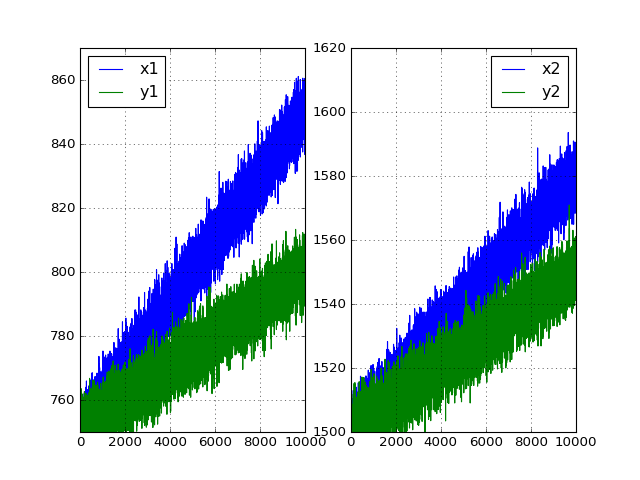

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.plot(fidX1, label = 'x1')
ax1.plot(fidY1, label = 'y1')
ax1.legend(loc = 'best')
ax1.grid(True)
ax1.set_ylim((startX1, startX1 + 120))

ax2.plot(fidX2, label = 'x2')
ax2.plot(fidY2, label = 'y2')
ax2.legend(loc = 'best')
ax2.grid(True)
ax2.set_ylim((startX2, startX2 + 120))
plt.show()

In [10]:
# Put two beads with these trajectories into the dataframe
fids = pd.DataFrame(np.vstack((np.vstack((fidX1, fidY1)).T, np.vstack((fidX2, fidY2)).T)),
                    index = np.arange(0, 2 * numFrames),
                    columns = ['x [nm]', 'y [nm]'])
fids = pd.concat([fids, pd.DataFrame(np.hstack((np.arange(0, numFrames), np.arange(0,numFrames))),
                                    index = np.arange(0,2 *numFrames),
                                    columns = ['frame'])], axis = 1)
fids = pd.concat([fids, pd.DataFrame(columns = ['z [nm]',
                                               'uncertainty [nm]',
                                               'intensity [photon]',
                                               'offset [photon]',
                                               'loglikelihood',
                                               'sigma [nm]'],
                                     index = np.arange(0,numFrames))], axis = 1)
fids['z [nm]']             = np.zeros(2*numFrames)
fids['uncertainty [nm]']   = 10 * np.ones(2*numFrames)   + np.random.randn(2*numFrames)
fids['intensity [photon]'] = 1000 * np.ones(2*numFrames) + 100 * np.random.randn(2*numFrames)
fids['offset [photon]']    = 100 * np.ones(2*numFrames)  + 10 * np.random.randn(2*numFrames)
fids['loglikelihood']      = 180 * np.ones(2*numFrames)  + 30 * np.random.randn(2*numFrames)
fids['sigma [nm]']         = 140 * np.ones(2*numFrames)  + 20 * np.random.randn(2*numFrames)
fids.sort_values('frame', inplace = True)
fids.index = np.arange(0, locs.shape[0])
fids.describe()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
count,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1170.123694,1149.958388,4999.500000,0.0,10.002292,999.202614,99.982941,180.309769,139.919436
std,370.965057,375.352108,2886.823503,0.0,0.991929,99.583659,10.021124,30.407037,20.143922
min,736.909264,736.567793,0.000000,0.0,6.024892,616.093044,58.704158,54.588759,58.773426
25%,800.181302,775.044679,2499.750000,0.0,9.331537,930.647612,93.219929,160.079710,126.395000
50%,1171.988193,1146.388728,4999.500000,0.0,9.998178,999.247812,99.975462,180.148522,139.938522
75%,1540.106803,1525.052009,7499.250000,0.0,10.675994,1066.905136,106.787326,200.778894,153.590678
max,1593.605268,1570.923216,9999.000000,0.0,13.871018,1409.176877,138.125363,306.978629,213.333930


In [102]:
np.vstack((np.vstack((fidX1, fidY1)).T, np.vstack((fidX2, fidY2)).T)).shape

(20000, 2)

In [11]:
# Combine fiducial and localization DataFrame
finalLocs = pd.concat((locs, fids), ignore_index=True)

In [16]:
finalLocs.head()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm]
0,0.0,0.0,0,0.0,11.846750,1133.529413,106.771677,195.681105,130.815288
1,200.0,200.0,0,0.0,8.030771,965.377076,87.482509,189.808398,167.639407
2,200.0,200.0,1,0.0,9.739837,871.172118,95.214598,123.703294,143.832099
3,0.0,0.0,1,0.0,10.575083,931.463884,98.547417,213.897172,154.525313
4,0.0,0.0,2,0.0,10.848551,930.701567,106.245948,192.916467,123.596653


In [17]:
finalLocs.shape

(40000, 9)

In [18]:
finalLocs.to_csv('test_localizations_with_fiducials.csv')